In [1]:
pip install spotipy


In [10]:
!pip install plotly

In [34]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Spotify API credentials
client_id = '**************************'
client_secret = '**************************'

# Setup Spotify API client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Search for Tamil trending playlists
results = sp.search(q='Tamil Trending', type='playlist', limit=5)
playlists = results['playlists']['items']

# Display the playlist names and their links
for idx, playlist in enumerate(playlists):
    print(f"{idx+1}. {playlist['name']} - {playlist['external_urls']['spotify']}")


1. Hot Hits Tamil - https://open.spotify.com/playlist/37i9dQZF1DX1i3hvzHpcQV
2. Trending Now Tamil - https://open.spotify.com/playlist/37i9dQZF1DX4Im4BTs2WMg
3. Latest Tamil - https://open.spotify.com/playlist/37i9dQZF1DWVo4cdnikh7Z
4. Trending Now Telugu - https://open.spotify.com/playlist/37i9dQZF1DWTt3gMo0DLxA
5. Kollywood Cream - https://open.spotify.com/playlist/37i9dQZF1DX0TyiNWW7uUQ


In [35]:
# Select the first playlist (you can choose another one based on your search results)
playlist_id = playlists[0]['id']  # ID of the first playlist

# Get tracks from the playlist
tracks = sp.playlist_tracks(playlist_id)

# Store track data in a list
track_data = []
for item in tracks['items']:
    track = item['track']
    track_info = {
        'track_name': track['name'],
        'artist': track['artists'][0]['name'],
        'popularity': track['popularity'],
        'album': track['album']['name'],
        'release_date': track['album']['release_date']
    }
    track_data.append(track_info)

# Convert to a pandas DataFrame for analysis
df = pd.DataFrame(track_data)
print(df.head())


                                       track_name               artist  \
0                  Manasilaayo (From "Vettaiyan")  Anirudh Ravichander   
1                    Water Packet (From "Raayan")          A.R. Rahman   
2                                           Matta   Yuvan Shankar Raja   
3                 Aasa Kooda - From "Think Indie"       Sai Abhyankkar   
4  Whistle Podu (From "The Greatest Of All Time")     Thalapathy Vijay   

   popularity                                           album release_date  
0          72                  Manasilaayo - From "Vettaiyan"   2024-09-09  
1          73                    Water Packet (From "Raayan")   2024-05-24  
2          58                        The Greatest Of All Time   2024-09-03  
3          80                 Aasa Kooda (From "Think Indie")   2024-06-13  
4          70  Whistle Podu (From "The Greatest Of All Time")   2024-04-14  


In [36]:
top_tracks = df.sort_values(by='popularity', ascending=False)
print(top_tracks[['track_name', 'artist', 'popularity']].head())


                          track_name               artist  popularity
3    Aasa Kooda - From "Think Indie"       Sai Abhyankkar          80
1       Water Packet (From "Raayan")          A.R. Rahman          73
11  Katchi Sera - From "Think Indie"       Sai Abhyankkar          73
0     Manasilaayo (From "Vettaiyan")  Anirudh Ravichander          72
8       Achacho - From "Aranmanai 4"       Hiphop Tamizha          71


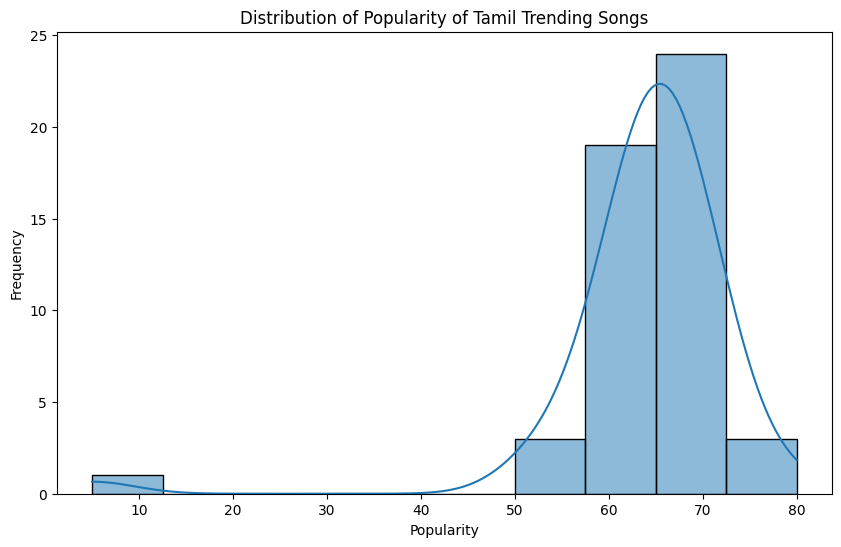

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot popularity distribution
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=10, kde=True)
plt.title('Distribution of Popularity of Tamil Trending Songs')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


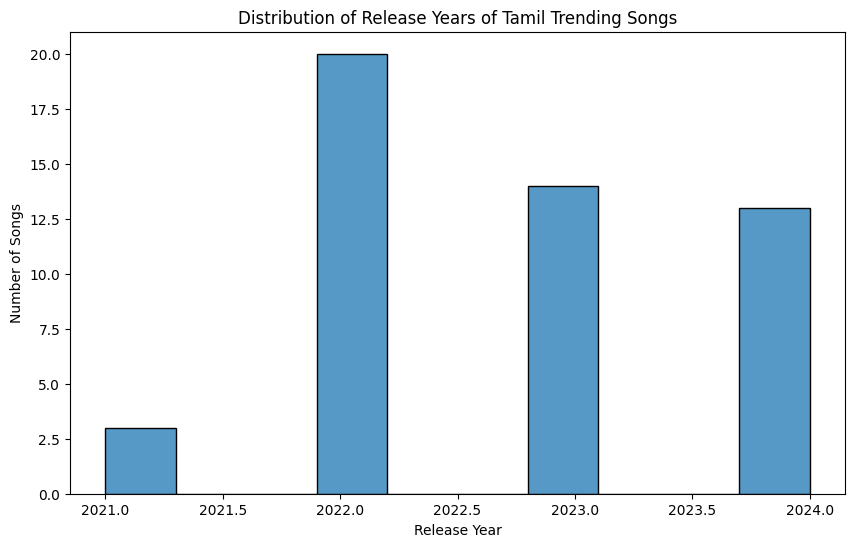

In [38]:
# Convert release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Plot release year distribution
plt.figure(figsize=(10,6))
sns.histplot(df['release_date'].dt.year, bins=10, kde=False)
plt.title('Distribution of Release Years of Tamil Trending Songs')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.show()


In [39]:
# Group by artist and find average popularity
artist_popularity = df.groupby('artist')['popularity'].mean().reset_index()

# Sort and display top artists
top_artists = artist_popularity.sort_values(by='popularity', ascending=False)
print(top_artists.head())


               artist  popularity
12     Sai Abhyankkar        76.5
9      Hiphop Tamizha        71.0
11         Paal Dabba        70.0
6     Govind Vasantha        70.0
1   Adarsh Krishnan N        69.0


In [40]:
# Extract tracks from the playlist with release date
track_data = []
for item in tracks['items']:
    track = item['track']
    track_info = {
        'track_name': track['name'],
        'artist': track['artists'][0]['name'],
        'popularity': track['popularity'],
        'album': track['album']['name'],
        'release_date': track['album']['release_date']  # Ensure this line is included
    }
    track_data.append(track_info)

# Convert to a pandas DataFrame for analysis
df = pd.DataFrame(track_data)

# Check the DataFrame columns and data
print(df.columns)
print(df.head())



Index(['track_name', 'artist', 'popularity', 'album', 'release_date'], dtype='object')
                                       track_name               artist  \
0                  Manasilaayo (From "Vettaiyan")  Anirudh Ravichander   
1                    Water Packet (From "Raayan")          A.R. Rahman   
2                                           Matta   Yuvan Shankar Raja   
3                 Aasa Kooda - From "Think Indie"       Sai Abhyankkar   
4  Whistle Podu (From "The Greatest Of All Time")     Thalapathy Vijay   

   popularity                                           album release_date  
0          72                  Manasilaayo - From "Vettaiyan"   2024-09-09  
1          73                    Water Packet (From "Raayan")   2024-05-24  
2          58                        The Greatest Of All Time   2024-09-03  
3          80                 Aasa Kooda (From "Think Indie")   2024-06-13  
4          70  Whistle Podu (From "The Greatest Of All Time")   2024-04-14  


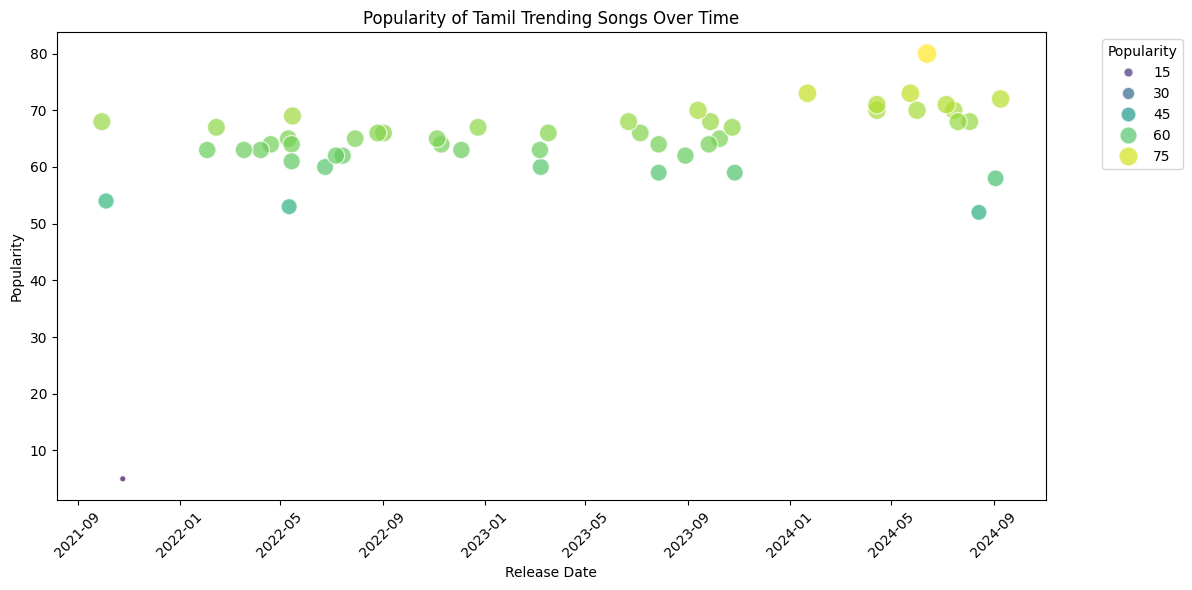

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Convert release_date to datetime if not already done
df['release_date'] = pd.to_datetime(df['release_date'])

# Scatter plot of popularity vs release date
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='release_date', y='popularity', hue='popularity', palette='viridis', size='popularity', sizes=(20, 200), alpha=0.7)

plt.title('Popularity of Tamil Trending Songs Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
